1\. **Pandas DataFrame**

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a pair of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every `x` BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [1]:
# If haven't downloaded it yet, please get the data file with wget
!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ./data/

--2023-11-30 17:11:44--  https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.18, 2620:100:6025:18::a27d:4512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/xvjzaxzz3ysphme/data_000637.txt [following]
--2023-11-30 17:11:44--  https://www.dropbox.com/s/raw/xvjzaxzz3ysphme/data_000637.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc6a0f5fe682ff137c89031e40d6.dl.dropboxusercontent.com/cd/0/inline/CIivOXduIBcHgyNP77o8KH2p93imtUINZPWs7KwBKOZeqy2-ap5B5z9z1KasrYOqm2QJw3Wi5ggCwoLNWlaK3XEInL9o5uZtRWyuzg-CY9DSVCHGlsIn8ppNTXcMsEfveyA/file# [following]
--2023-11-30 17:11:45--  https://uc6a0f5fe682ff137c89031e40d6.dl.dropboxusercontent.com/cd/0/inline/CIivOXduIBcHgyNP77o8KH2p93imtUINZPWs7KwBKOZeqy2-ap5B5z9z1KasrYOqm2QJw3Wi5ggCwoLNWlaK3XEInL9o5uZtRWyuzg-CY9DSVCH

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import math

1\. Create a Pandas DataFrame reading N rows of the `data/data_000637.txt` dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k (check the documentation).

In [3]:
file_name = "./data/data_000637.txt"
#n_rows_poss = 999999
n_rows_poss = 2000000 #int(input('Give me a number: '))
data = pd.read_csv(file_name, nrows=n_rows_poss)
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14
1310716,1,1,4,3869211171,763,11
1310717,1,0,64,3869211171,764,0
1310718,1,0,139,3869211171,769,0


2\. Estimate the number of BX in a ORBIT (the value `x`).

*Hint*: check when the BX counter reaches the maximum value before being reset to 0.

In [4]:
df = data.loc[:, ['ORBIT_CNT', 'BX_COUNTER']].groupby('ORBIT_CNT').transform(np.max)
print(df)
x = df['BX_COUNTER'].unique().mean()
print(x)

         BX_COUNTER
0              3187
1              3187
2              3187
3              3187
4              3187
...             ...
1310715         769
1310716         769
1310717         769
1310718         769
1310719         769

[1310720 rows x 1 columns]
2562.476127320955


3\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information) since the beginning of the data acquisition, and convert the new column to a Time Series.

*Hint:* introduce an offset to the absolute time such that the start of the data acquisition (i.e. the first entry) is zero.

In [5]:
data['DATA ABSOLUTE'] = pd.to_datetime(abs(data['ORBIT_CNT'] + data['BX_COUNTER'] + data['TDC_MEAS']))
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,DATA ABSOLUTE
0,1,0,123,3869200167,2374,26,1970-01-01 00:00:03.869202567
1,1,0,124,3869200167,2374,27,1970-01-01 00:00:03.869202568
2,1,0,63,3869200167,2553,28,1970-01-01 00:00:03.869202748
3,1,0,64,3869200167,2558,19,1970-01-01 00:00:03.869202744
4,1,0,64,3869200167,2760,25,1970-01-01 00:00:03.869202952
...,...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14,1970-01-01 00:00:03.869211947
1310716,1,1,4,3869211171,763,11,1970-01-01 00:00:03.869211945
1310717,1,0,64,3869211171,764,0,1970-01-01 00:00:03.869211935
1310718,1,0,139,3869211171,769,0,1970-01-01 00:00:03.869211940


In [6]:
import datetime as dt
data['TOTAL_TIME_timestamp'] = data['ORBIT_CNT']*x*25 + data['BX_COUNTER']*25 + data['TDC_MEAS']*(25/30)
print(data)
data['TOTAL_TIME_ns'] = pd.to_datetime(data['TOTAL_TIME_timestamp'], unit='ns')
print(data)

         HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS  \
0           1     0          123  3869200167        2374        26   
1           1     0          124  3869200167        2374        27   
2           1     0           63  3869200167        2553        28   
3           1     0           64  3869200167        2558        19   
4           1     0           64  3869200167        2760        25   
...       ...   ...          ...         ...         ...       ...   
1310715     1     0           62  3869211171         762        14   
1310716     1     1            4  3869211171         763        11   
1310717     1     0           64  3869211171         764         0   
1310718     1     0          139  3869211171         769         0   
1310719     1     0           61  3869211171         762        18   

                        DATA ABSOLUTE  TOTAL_TIME_timestamp  
0       1970-01-01 00:00:03.869202567          2.478683e+14  
1       1970-01-01 00:00:03.8692025

4\. Find out the duration of the data taking in hours, minutes and seconds, by using the features of the Time Series. Perform this check reading the whole dataset.

In [7]:
data
s = pd.Series([data.iloc[0, 7], data.iloc[-1, 7]])
s.diff()

0            NaN
1    704896876.0
dtype: float64

5\. Use the `.groupby()` method to find out the noisy channels, i.e. the TDC channels with most counts (print to screen the top 3 and the corresponding counts)

In [8]:
df = data.loc[:, ['TDC_CHANNEL','ORBIT_CNT']].groupby('TDC_CHANNEL').count()
df.sort_values(by='ORBIT_CNT', ascending=False)
df.rename(columns = {'ORBIT_CNT':'TDC_COUNT'}, inplace = True)
print(df)
print(df.loc[1:3, ['TDC_COUNT']])

             TDC_COUNT
TDC_CHANNEL           
1                29653
2                34271
3                23463
4                28755
5                16435
...                ...
129                 37
130                 71
137                 68
138                 70
139             108059

[133 rows x 1 columns]
             TDC_COUNT
TDC_CHANNEL           
1                29653
2                34271
3                23463


6\. Count the number of non-empty orbits (i.e. the number of orbits with at least one hit).

In [9]:
ne_o = len(data.groupby('ORBIT_CNT')['ORBIT_CNT'].count())
ne_o

11001

7\. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139.

In [10]:
orbits = data.loc[data['TDC_CHANNEL'] == 139, 'ORBIT_CNT'].unique()
n = len(orbits)
print(n)

10976


8\. Create two Series (one for each FPGA) that have the TDC channel as index, and the number of counts for the corresponding TDC channel as values.

In [11]:
fpga_0 = data.loc[data['FPGA']==0].groupby('TDC_CHANNEL')['TDC_CHANNEL'].count()
print(fpga_0)
fpga_1 = data.loc[data['FPGA']==1].groupby('TDC_CHANNEL')['TDC_CHANNEL'].count()
fpga_1

TDC_CHANNEL
1       1215
2       1602
3       1493
4       2352
5       1432
       ...  
129        2
130       33
137       32
138       34
139    75617
Name: TDC_CHANNEL, Length: 124, dtype: int64


TDC_CHANNEL
1      28438
2      32669
3      21970
4      26403
5      15003
       ...  
129       35
130       38
137       36
138       36
139    32442
Name: TDC_CHANNEL, Length: 132, dtype: int64

9\. **Optional:** Create two histograms (one for each FPGA) that show the number of counts for each TDC channel.

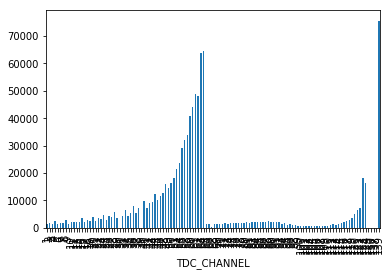

In [12]:
import matplotlib.pyplot as plt
#plt.plot(fpga_0.iloc[0], fpga_0.iloc[1])
fpga_0.plot(kind='bar')



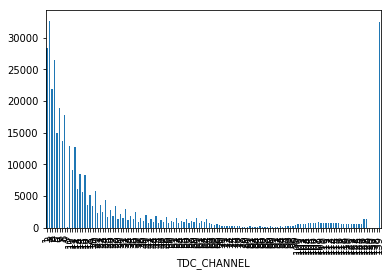

In [13]:
fpga_1.plot(kind='bar')
